<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v6_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))
# change to 256 depth weight in 4th layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))
# add another (3, 3, 256) weights layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# tuning dropout rate here
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from keras import optimizers

import tensorflow as tf

# change callback function
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1 - epoch/300))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 40
epoch_lenth = 200
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/60
50/50 [==============================] - 669s 13s/step - loss: 0.8070 - acc: 0.4990 - val_loss: 0.7512 - val_acc: 0.5000
Epoch 2/60
50/50 [==============================] - 124s 2s/step - loss: 0.7372 - acc: 0.5020 - val_loss: 0.7345 - val_acc: 0.5000
Epoch 3/60
50/50 [==============================] - 124s 2s/step - loss: 0.7132 - acc: 0.5210 - val_loss: 0.6995 - val_acc: 0.5000
Epoch 4/60
50/50 [==============================] - 123s 2s/step - loss: 0.6970 - acc: 0.5265 - val_loss: 0.6721 - val_acc: 0.5570
Epoch 5/60
50/50 [==============================] - 123s 2s/step - loss: 0.6958 - acc: 0.5515 - val_loss: 0.6887 - val_acc: 0.5690
Epoch 6/60
50/50 [==============================] - 123s 2s/step - loss: 0.6797 - acc: 0.5730 - val_loss: 0.6627 - val_acc: 0.5820
Epoch 7/60
50/50 [==============================] - 123s 2s/step - loss: 0.6920 - acc: 0.5900 - val_loss: 0.6464 - val_acc: 0.6370
Epoch 8/60
50/50 [==============================] - 123s 2s/step - loss: 0.6939 - 

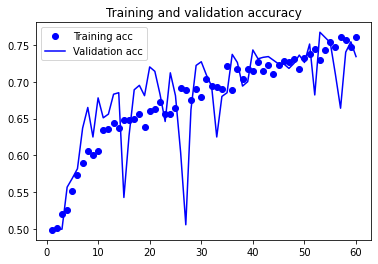

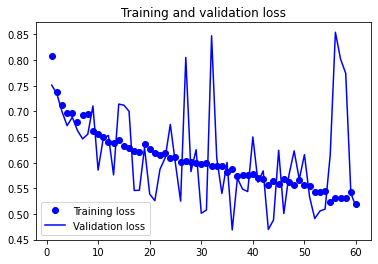

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('cats_and_dogs_small.h5')

Save model and further train in next day

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/cats&dogs/cats_and_dogs_small.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/200
 2/50 [>.............................] - ETA: 22:20 - loss: 0.8780 - acc: 0.6000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/50 [===========>..................] - ETA: 13:27 - loss: 0.5718 - acc: 0.7300

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/50 [==============================] - 1681s 34s/step - loss: 0.5445 - acc: 0.7430 - val_loss: 0.6906 - val_acc: 0.7390
Epoch 2/200
50/50 [==============================] - 119s 2s/step - loss: 0.5400 - acc: 0.7480 - val_loss: 0.5312 - val_acc: 0.7560
Epoch 3/200
50/50 [==============================] - 123s 2s/step - loss: 0.5192 - acc: 0.7565 - val_loss: 0.4495 - val_acc: 0.7300
Epoch 4/200
50/50 [==============================] - 119s 2s/step - loss: 0.5440 - acc: 0.7420 - val_loss: 0.4238 - val_acc: 0.7080
Epoch 5/200
50/50 [==============================] - 119s 2s/step - loss: 0.5331 - acc: 0.7525 - val_loss: 0.4228 - val_acc: 0.7660
Epoch 6/200
50/50 [==============================] - 120s 2s/step - loss: 0.5206 - acc: 0.7635 - val_loss: 0.8094 - val_acc: 0.6680
Epoch 7/200
50/50 [==============================] - 119s 2s/step - loss: 0.5260 - acc: 0.7505 - val_loss: 0.5066 - val_acc: 0.7700
Epoch 8/200
50/50 [==============================] - 123s 2s/step - loss: 0.5120 - acc

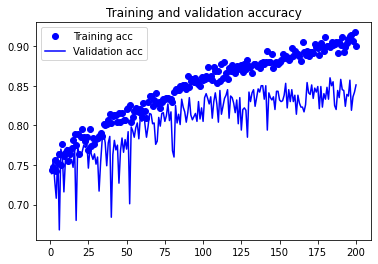

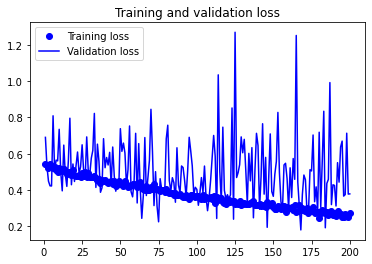

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test1_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test1_generator)

Found 1000 images belonging to 2 classes.


[0.39919400215148926, 0.843999981880188]

In [ ]:
model.save('/content/drive/My Drive/dataset/cats&dogs/small_dataset/cats_and_dogs_small_f1.h5')